In [2]:
import pandas as pd

single = pd.read_csv("/Users/jacob/Desktop/Research/Knowles/SingleEdgeFreq2.csv")
single = single.drop("Unnamed: 0", axis=1)

In [3]:
single

,Source,Target,Source Time Label,Target Time Label,edge_weight,Source Lifestyle,Target Lifestyle
0,ind-DNK_MH0343_k99_52271,ind-DNK_MH0192_k99_103327,Industrial,Industrial,2.596023,Lytic,Lytic
1,ind-DNK_MH0374_k99_184669,ind-DNK_MH0192_k99_103327,Industrial,Industrial,5.207088,Lytic,Lytic
2,ind-DNK_MH0390_k99_197017,ind-DNK_MH0192_k99_103327,Industrial,Industrial,124.240802,Lytic,Lytic
3,ind-DNK_MH0394_k99_157803,ind-DNK_MH0192_k99_103327,Industrial,Industrial,10.846302,Lytic,Lytic
4,ind-ESP_O2.UC29.1_k99_66998,ind-DNK_MH0192_k99_103327,Industrial,Industrial,8.713587,Lytic,Lytic
...,...,...,...,...,...,...,...
135681,pre-TZA_H8_k119_40821,pre-TZA_H6_k119_91918,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135682,pre-TZA_H9_k119_112156,pre-TZA_H6_k119_91918,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135683,pre-TZA_H8_k119_40821,pre-TZA_H7_k119_54737,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135684,pre-TZA_H9_k119_112156,pre-TZA_H7_k119_54737,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic


In [4]:
len(list(set(single["Source"])))

5042

In [5]:
Real_Freq = {}
types = ["Industrial", "Pre-modern", "Non-Industrial"]
perms = [ [0,0], [0,1], [0,2], [1,1], [1,2], [2,2] ]    

In [6]:
for pair in perms:
    L = len(single[ ((single["Source Time Label"] == types[pair[0]]) & (single["Target Time Label"] == types[pair[1]])) | 
           ((single["Source Time Label"] == types[pair[1]]) & (single["Target Time Label"] == types[pair[0]])) ])
    
    prop = L/len(single)

    name = types[pair[0]] + " and " + types[pair[1]]

    Real_Freq[name] = prop

In [7]:
Real_Freq

{'Industrial and Industrial': 0.25715991332930443,
 'Industrial and Pre-modern': 0.009964182008460712,
 'Industrial and Non-Industrial': 0.3498739737334729,
 'Pre-modern and Pre-modern': 0.00022109871320548914,
 'Pre-modern and Non-Industrial': 0.01304482407912386,
 'Non-Industrial and Non-Industrial': 0.36973600813643265}

In [8]:
Nodes = pd.read_csv("/Users/jacob/Downloads/cleaned_genome_to_time_lifestyle.csv")
Nodes = Nodes.drop("Unnamed: 0", axis=1)
Nodes["Time Period"] = Nodes["Time Period"].replace("Non_Industrial", "Non-Industrial")


Nodes_Without_D = Nodes[(Nodes["Time Period"] == "Industrial") | (Nodes["Time Period"] == "Pre-modern") | (Nodes["Time Period"] == "Non-Industrial")]
Nodes_Without_D = Nodes_Without_D.reset_index()
Nodes_D = Nodes
Nodes = Nodes_Without_D

In [9]:
Nodes

,index,Genome,Time Period,Lifestyle
0,0,ind-DNK_MH0192_k99_103327,Industrial,Lytic
1,1,ind-DNK_MH0192_k99_112007,Industrial,Lytic
2,2,ind-DNK_MH0192_k99_112008,Industrial,Lytic
3,3,ind-DNK_MH0192_k99_112019,Industrial,Lytic
4,4,ind-DNK_MH0192_k99_59628,Industrial,Lytic
...,...,...,...,...
5297,5297,pre-TZA_H9_k119_112133,Non-Industrial,Lytic
5298,5298,pre-TZA_H9_k119_112136,Non-Industrial,Lytic
5299,5299,pre-TZA_H9_k119_112156,Non-Industrial,Lytic
5300,5300,pre-TZA_H9_k119_84601,Non-Industrial,Lytic


In [10]:
from collections import Counter
frequency = Counter(Nodes["Time Period"])
frequency

Counter({'Industrial': 2354, 'Pre-modern': 89, 'Non-Industrial': 2859})

In [11]:
count2 = Counter(Nodes_D["Time Period"])
count2

Counter({'Industrial': 2354,
         'Pre-modern': 89,
         'Non-Industrial': 2859,
         'Database': 3501})

In [9]:
import random

ind = list(Nodes.index)
first = random.sample(ind, len(ind))
sources = Nodes.iloc[first]["Time Period"].tolist()
second = random.sample(ind, len(ind))
targets = Nodes.iloc[second]["Time Period"].tolist()

resampled = pd.DataFrame({"Source Time Label" : sources, "Target Time Label" : targets})
resampled

,Source Time Label,Target Time Label
0,Industrial,Industrial
1,Non-Industrial,Non-Industrial
2,Non-Industrial,Industrial
3,Non-Industrial,Industrial
4,Industrial,Industrial
...,...,...
5297,Non-Industrial,Industrial
5298,Non-Industrial,Industrial
5299,Non-Industrial,Industrial
5300,Industrial,Non-Industrial


In [10]:
types = ["Industrial", "Pre-modern", "Non-Industrial"]
perms = [ [0,0], [0,1], [0,2], [1,1], [1,2], [2,2] ]

Simulated_Freq = {'Industrial and Industrial': [],
 'Industrial and Pre-modern': [],
 'Industrial and Non-Industrial': [],
 'Pre-modern and Pre-modern': [],
 'Pre-modern and Non-Industrial': [],
 'Non-Industrial and Non-Industrial': []}

for i in range(10000):
    ind = list(Nodes.index)
    first = random.sample(ind, len(ind))
    sources = Nodes.iloc[first]["Time Period"].tolist()
    second = random.sample(ind, len(ind))
    targets = Nodes.iloc[second]["Time Period"].tolist()

    resampled = pd.DataFrame({"Source Time Label" : sources, "Target Time Label" : targets})



    for pair in perms:
        L = len(resampled[ ((resampled["Source Time Label"] == types[pair[0]]) & (resampled["Target Time Label"] == types[pair[1]])) | 
            ((resampled["Source Time Label"] == types[pair[1]]) & (resampled["Target Time Label"] == types[pair[0]])) ])
        
        prop = L/len(resampled)

        name = types[pair[0]] + " and " + types[pair[1]]

        Simulated_Freq[name].append(prop)

In [11]:
Simulated_Freq

{'Industrial and Industrial': [0.1959637872500943,
  0.1950207468879668,
  0.1980384760467748,
  0.19483213881554132,
  0.2003017729158808,
  0.19388909845341382,
  0.1986043002640513,
  0.1965296114673708,
  0.1953979630328178,
  0.1955865711052433,
  0.1921916258015843,
  0.1959637872500943,
  0.19238023387400982,
  0.1935118823085628,
  0.1970954356846473,
  0.1940777065258393,
  0.1953979630328178,
  0.1942663145982648,
  0.1984156921916258,
  0.2038853262919653,
  0.2046397585816673,
  0.2012448132780083,
  0.1950207468879668,
  0.1974726518294983,
  0.2018106374952848,
  0.19483213881554132,
  0.1995473406261788,
  0.1976612599019238,
  0.1950207468879668,
  0.1942663145982648,
  0.1970954356846473,
  0.19388909845341382,
  0.1970954356846473,
  0.1987929083364768,
  0.1916258015843078,
  0.2036967182195398,
  0.1942663145982648,
  0.2012448132780083,
  0.20256506978498678,
  0.19105997736703131,
  0.1959637872500943,
  0.2006789890607318,
  0.1950207468879668,
  0.19275745001886

In [12]:
Simulated_Means = {}

for key in Simulated_Freq.keys():
    M = sum(Simulated_Freq[key])/len(Simulated_Freq[key])
    Simulated_Means[key] = M

In [13]:
Simulated_Means

{'Industrial and Industrial': 0.1971529988683516,
 'Industrial and Pre-modern': 0.014911014711429664,
 'Industrial and Non-Industrial': 0.4787497925311206,
 'Pre-modern and Pre-modern': 0.0002824217276499591,
 'Pre-modern and Non-Industrial': 0.01809637872500949,
 'Non-Industrial and Non-Industrial': 0.2908073934364376}

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

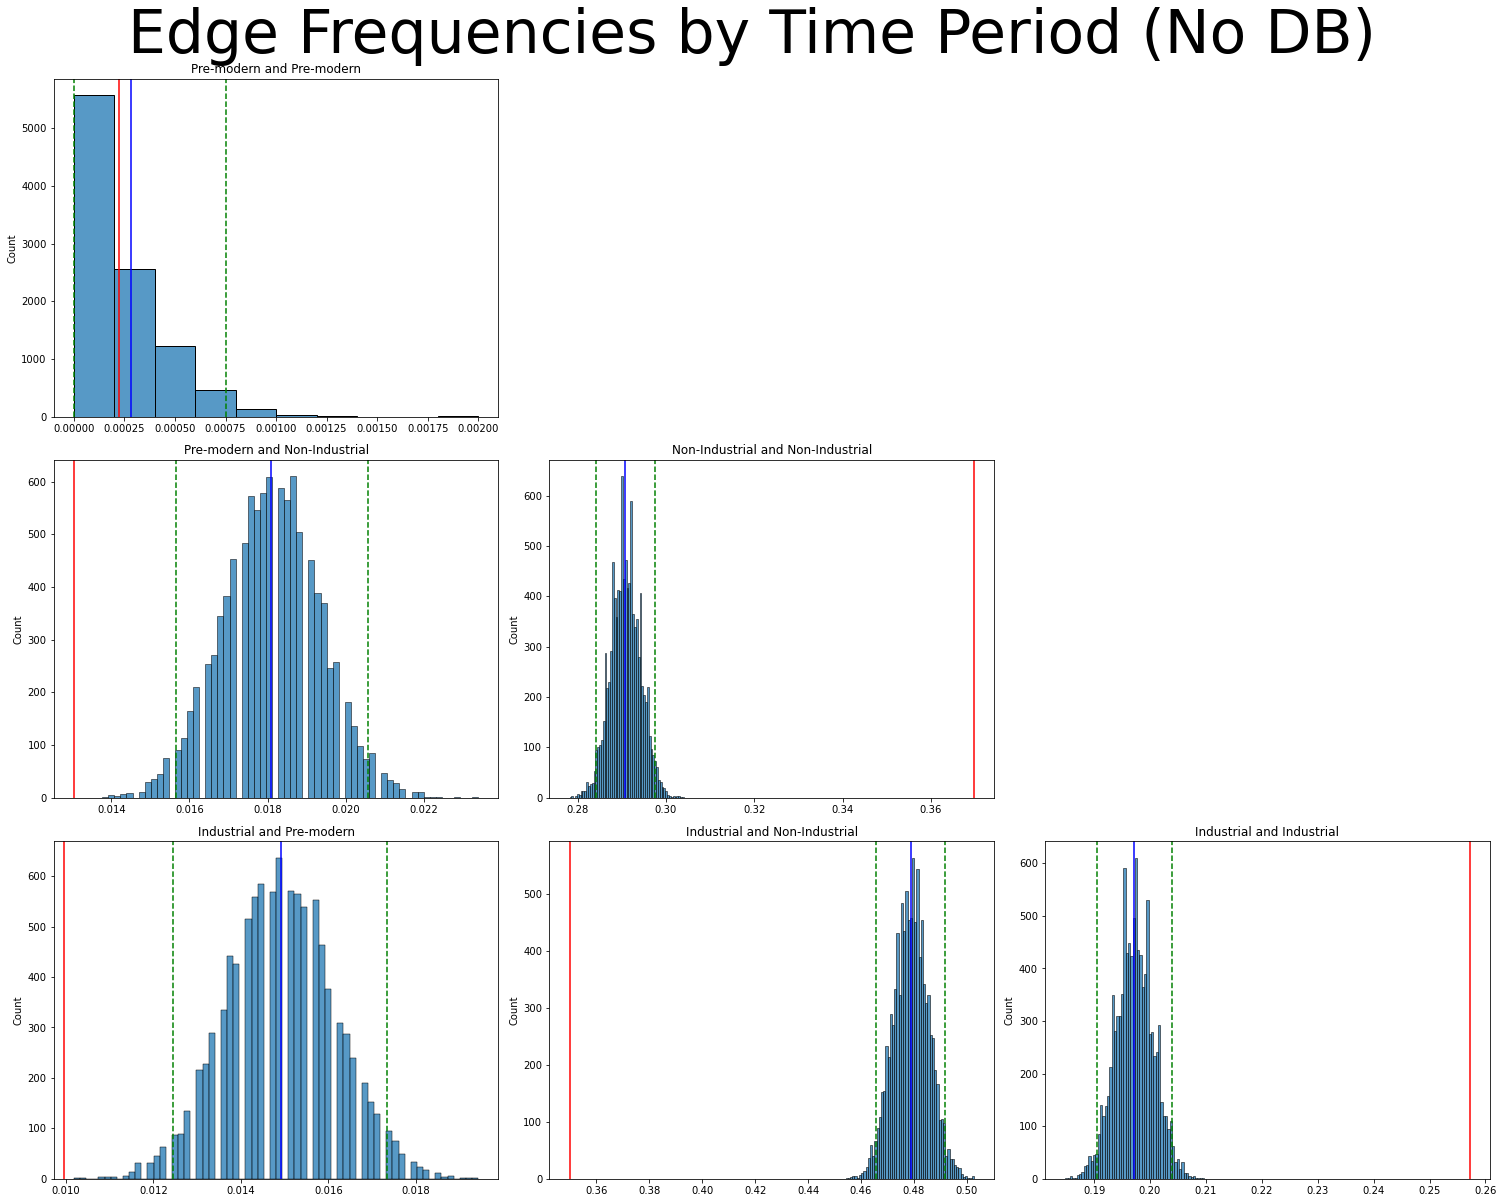

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Example simulated data (replace these with your actual data)
# Simulated_Freq and Real_Freq are assumed to be pandas DataFrames or dictionaries with the relevant columns/keys.

fig, axs  = plt.subplots(3,3, figsize = (21, 17))
fig.suptitle("Edge Frequencies by Time Period (No DB)", size = 60 )

# Helper function to calculate confidence interval
def add_confidence_interval(data, ax):
    mean = np.mean(data)
    confidence_interval = [] # = stats.norm.interval(0.95, loc=mean, scale=np.std(data)/np.sqrt(len(data)))
    confidence_interval.append(np.percentile(data,2.5))
    confidence_interval.append(np.percentile(data,97.5))

    

    # Add confidence interval bars
    ax.axvline(x=confidence_interval[0], color='green', linestyle='--', label='95% CI lower bound')
    ax.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% CI upper bound')
    ax.axvline(x=mean, color='blue', linestyle='-', label='Mean')

# Plot 1: Pre-modern and Pre-modern
sns.histplot(Simulated_Freq["Pre-modern and Pre-modern"], ax = axs[0,0], binwidth= .0002)
axs[0,0].axvline(x = Real_Freq['Pre-modern and Pre-modern'], color = "red")
add_confidence_interval(Simulated_Freq["Pre-modern and Pre-modern"], axs[0,0])
axs[0,0].set_title("Pre-modern and Pre-modern")

# Plot 2: Pre-modern and Non-Industrial
sns.histplot(Simulated_Freq["Pre-modern and Non-Industrial"], ax = axs[1,0])
axs[1,0].axvline(x = Real_Freq['Pre-modern and Non-Industrial'], color = "red")
add_confidence_interval(Simulated_Freq["Pre-modern and Non-Industrial"], axs[1,0])
axs[1,0].set_title("Pre-modern and Non-Industrial")

# Plot 3: Non-Industrial and Non-Industrial
sns.histplot(Simulated_Freq["Non-Industrial and Non-Industrial"], ax = axs[1,1])
axs[1,1].axvline(x = Real_Freq['Non-Industrial and Non-Industrial'], color = "red")
add_confidence_interval(Simulated_Freq["Non-Industrial and Non-Industrial"], axs[1,1])
axs[1,1].set_title("Non-Industrial and Non-Industrial")

# Plot 4: Industrial and Pre-modern
sns.histplot(Simulated_Freq["Industrial and Pre-modern"], ax = axs[2,0])
axs[2,0].axvline(x = Real_Freq['Industrial and Pre-modern'], color = "red")
add_confidence_interval(Simulated_Freq["Industrial and Pre-modern"], axs[2,0])
axs[2,0].set_title("Industrial and Pre-modern")

# Plot 5: Industrial and Non-Industrial
sns.histplot(Simulated_Freq["Industrial and Non-Industrial"], ax = axs[2,1])
axs[2,1].axvline(x = Real_Freq['Industrial and Non-Industrial'], color = "red")
add_confidence_interval(Simulated_Freq["Industrial and Non-Industrial"], axs[2,1])
axs[2,1].set_title("Industrial and Non-Industrial")

# Plot 6: Industrial and Industrial
sns.histplot(Simulated_Freq["Industrial and Industrial"], ax = axs[2,2])
axs[2,2].axvline(x = Real_Freq['Industrial and Industrial'], color = "red")
add_confidence_interval(Simulated_Freq["Industrial and Industrial"], axs[2,2])
axs[2,2].set_title("Industrial and Industrial")

# Set unused subplots invisible
axs[0,1].set_visible(False)
axs[0,2].set_visible(False)
axs[1,2].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()

fig.savefig("/Users/jacob/Desktop/Research/Knowles/BIG Summer/Permutation Figure Final.pdf", format = "pdf")


In [ ]:
from scipy import stats
import numpy as np

#mean = np.mean(data)

#confidence_interval = stats.norm.interval(0.95, loc=mean, scale=np.std(data)/np.sqrt(len(data)))
#plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='95% CI lower bound')
#plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% CI upper bound')
#plt.axvline(x=mean, color='blue', linestyle='-', label='Mean')



fig, axs  = plt.subplots(3,3, figsize = (21, 17))
fig.suptitle("Edge Frequencies by Time Period (No DB)", size = 60 )

sns.histplot(Simulated_Freq["Pre-modern and Pre-modern"], ax = axs[0,0], binwidth= .0002)
axs[0,0].axvline(x = Real_Freq['Pre-modern and Pre-modern'], color = "red", linestyle = "-." )
axs[0,0].set_title("Pre-modern and Pre-modern")

sns.histplot(Simulated_Freq["Pre-modern and Non-Industrial"], ax = axs[1,0])
axs[1,0].axvline(x = Real_Freq['Pre-modern and Non-Industrial'], color = "red")
axs[1,0].set_title("Pre-modern and Non-Industrial")

sns.histplot(Simulated_Freq["Non-Industrial and Non-Industrial"], ax = axs[1,1])
axs[1,1].axvline(x = Real_Freq['Non-Industrial and Non-Industrial'], color = "red")
axs[1,1].set_title("Non-Industrial and Non-Industrial")

sns.histplot(Simulated_Freq["Industrial and Pre-modern"], ax = axs[2,0])
axs[2,0].axvline(x = Real_Freq['Industrial and Pre-modern'], color = "red")
axs[2,0].set_title("Industrial and Pre-modern")

sns.histplot(Simulated_Freq["Industrial and Non-Industrial"], ax = axs[2,1])
axs[2,1].axvline(x = Real_Freq['Industrial and Non-Industrial'], color = "red")
axs[2,1].set_title("Industrial and Non-Industrial")

sns.histplot(Simulated_Freq["Industrial and Industrial"], ax = axs[2,2])
axs[2,2].axvline(x = Real_Freq['Industrial and Industrial'], color = "red")
axs[2,2].set_title("Industrial and Industrial")

axs[0,1].set_visible(False)
axs[0,2].set_visible(False)
axs[1,2].set_visible(False)



fig.text(.05,.75, "PM", size = 50)
fig.text(.055,.5, "NI", size = 50)
fig.text(.065,.25, "I", size = 50)

fig.text(.22, .05, "PM", size = 50)
fig.text(.5, .05, "NI", size = 50)
fig.text(.78, .05, "I", size = 50)

#plt.legend("Red Vertical Line", bbox_to_anchor = [0, 3])







In [17]:
columns = ["Pre-modern and Pre-modern", "Pre-modern and Non-Industrial", "Non-Industrial and Non-Industrial", "Industrial and Pre-modern", "Industrial and Non-Industrial", "Industrial and Industrial"]
rows = ["observed", "simulated mean", "upper bound", "lower bound"]

info = pd.DataFrame(columns=columns, index=rows)

for col in info.columns:
    info.loc["observed", col] = Real_Freq[col]
    info.loc["simulated mean", col] = np.mean(Simulated_Freq[col])
    info.loc["upper bound", col] = np.percentile(Simulated_Freq[col], 97.5)
    info.loc["lower bound", col] = np.percentile(Simulated_Freq[col], 2.5)

In [45]:
info
info.to_csv("/Users/jacob/Desktop/Research/Knowles/BIG Summer/Permutation table final.csv", index=True)

In [20]:
Nodes_D

import random

types_D = ["Industrial", "Pre-modern", "Non-Industrial", 'Database']
perms_D = [ [0,0], [0,1], [0,2], [0,3], [1,1], [1,2], [1,3], [2,2], [2,3], [3,3] ]

Simulated_Freq_D = {'Industrial and Industrial': [],
 'Industrial and Pre-modern': [],
 'Industrial and Non-Industrial': [],
 'Industrial and Database': [],
 'Pre-modern and Pre-modern': [],
 'Pre-modern and Non-Industrial': [],
 'Pre-modern and Database': [],
 'Non-Industrial and Non-Industrial': [],
 'Non-Industrial and Database': [], 
 'Database and Database': []}

for i in range(10000):
    ind = list(Nodes_D.index)
    first = random.sample(ind, len(ind))
    sources = Nodes_D.iloc[first]["Time Period"].tolist()
    second = random.sample(ind, len(ind))
    targets = Nodes_D.iloc[second]["Time Period"].tolist()

    resampled = pd.DataFrame({"Source Time Label" : sources, "Target Time Label" : targets})



    for pair in perms_D:
        L = len(resampled[ ((resampled["Source Time Label"] == types_D[pair[0]]) & (resampled["Target Time Label"] == types_D[pair[1]])) | 
            ((resampled["Source Time Label"] == types_D[pair[1]]) & (resampled["Target Time Label"] == types_D[pair[0]])) ])
        
        prop = L/len(resampled)

        name = types_D[pair[0]] + " and " + types_D[pair[1]]

        Simulated_Freq_D[name].append(prop)

In [21]:
Simulated_Means_D = {}

for key in Simulated_Freq_D.keys():
    M = sum(Simulated_Freq_D[key])/len(Simulated_Freq_D[key])
    Simulated_Means_D[key] = M

In [22]:
single_database = pd.read_csv("/Users/jacob/Desktop/Research/Knowles/SingleEdgeFreq_Database.csv")


/var/folders/0h/xlbp07_12rq0kpnfc4zz21fh0000gn/T/ipykernel_77168/3225561544.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  single_database = pd.read_csv("/Users/jacob/Desktop/Research/Knowles/SingleEdgeFreq_Database.csv")


In [23]:
single_database


,Unnamed: 0,Source,Target,Source Time Label,Target Time Label,edge_weight,Source Lifestyle,Target Lifestyle
0,0,ind-DNK_MH0343_k99_52271,ind-DNK_MH0192_k99_103327,Industrial,Industrial,2.596023,Lytic,Lytic
1,1,ind-DNK_MH0374_k99_184669,ind-DNK_MH0192_k99_103327,Industrial,Industrial,5.207088,Lytic,Lytic
2,2,ind-DNK_MH0390_k99_197017,ind-DNK_MH0192_k99_103327,Industrial,Industrial,124.240802,Lytic,Lytic
3,3,ind-DNK_MH0394_k99_157803,ind-DNK_MH0192_k99_103327,Industrial,Industrial,10.846302,Lytic,Lytic
4,4,ind-ESP_O2.UC29.1_k99_66998,ind-DNK_MH0192_k99_103327,Industrial,Industrial,8.713587,Lytic,Lytic
...,...,...,...,...,...,...,...,...
229586,229586,Yersinia~phage~vB_YenP_AP10,Yersinia~phage~phiYe-F10,Database,Database,48.668208,NaN,NaN
229587,229587,Yersinia~phage~vB_YenP_AP5,Yersinia~phage~phiYe-F10,Database,Database,134.264786,NaN,NaN
229588,229588,Yersinia~phage~vB_YenP_AP10,Yersinia~phage~phiYeO3-12,Database,Database,39.384131,NaN,NaN
229589,229589,Yersinia~phage~vB_YenP_AP5,Yersinia~phage~phiYeO3-12,Database,Database,141.070879,NaN,NaN


In [24]:
len(list(set(single_database["Source"])))

8369

In [25]:
Real_Freq_D = {}
types_D = ["Industrial", "Pre-modern", "Non-Industrial", 'Database']
perms_D = [ [0,0], [0,1], [0,2], [0,3], [1,1], [1,2], [1,3], [2,2], [2,3], [3,3] ]

In [26]:

for pair in perms_D:
    L = len(single_database[ ((single_database["Source Time Label"] == types_D[pair[0]]) & (single_database["Target Time Label"] == types_D[pair[1]])) | 
           ((single_database["Source Time Label"] == types_D[pair[1]]) & (single_database["Target Time Label"] == types_D[pair[0]])) ])
    
    prop = L/len(single_database)

    name = types_D[pair[0]] + " and " + types_D[pair[1]]

    Real_Freq_D[name] = prop

In [27]:
Real_Freq_D

{'Industrial and Industrial': 0.15197895387885413,
 'Industrial and Pre-modern': 0.005888732572269819,
 'Industrial and Non-Industrial': 0.2067720424581103,
 'Industrial and Database': 0.024669956574952853,
 'Pre-modern and Pre-modern': 0.0001306671428758096,
 'Pre-modern and Non-Industrial': 0.007709361429672766,
 'Pre-modern and Database': 0.0011716487144530926,
 'Non-Industrial and Non-Industrial': 0.2185103074597872,
 'Non-Industrial and Database': 0.04341633600620234,
 'Database and Database': 0.3397519937628217}

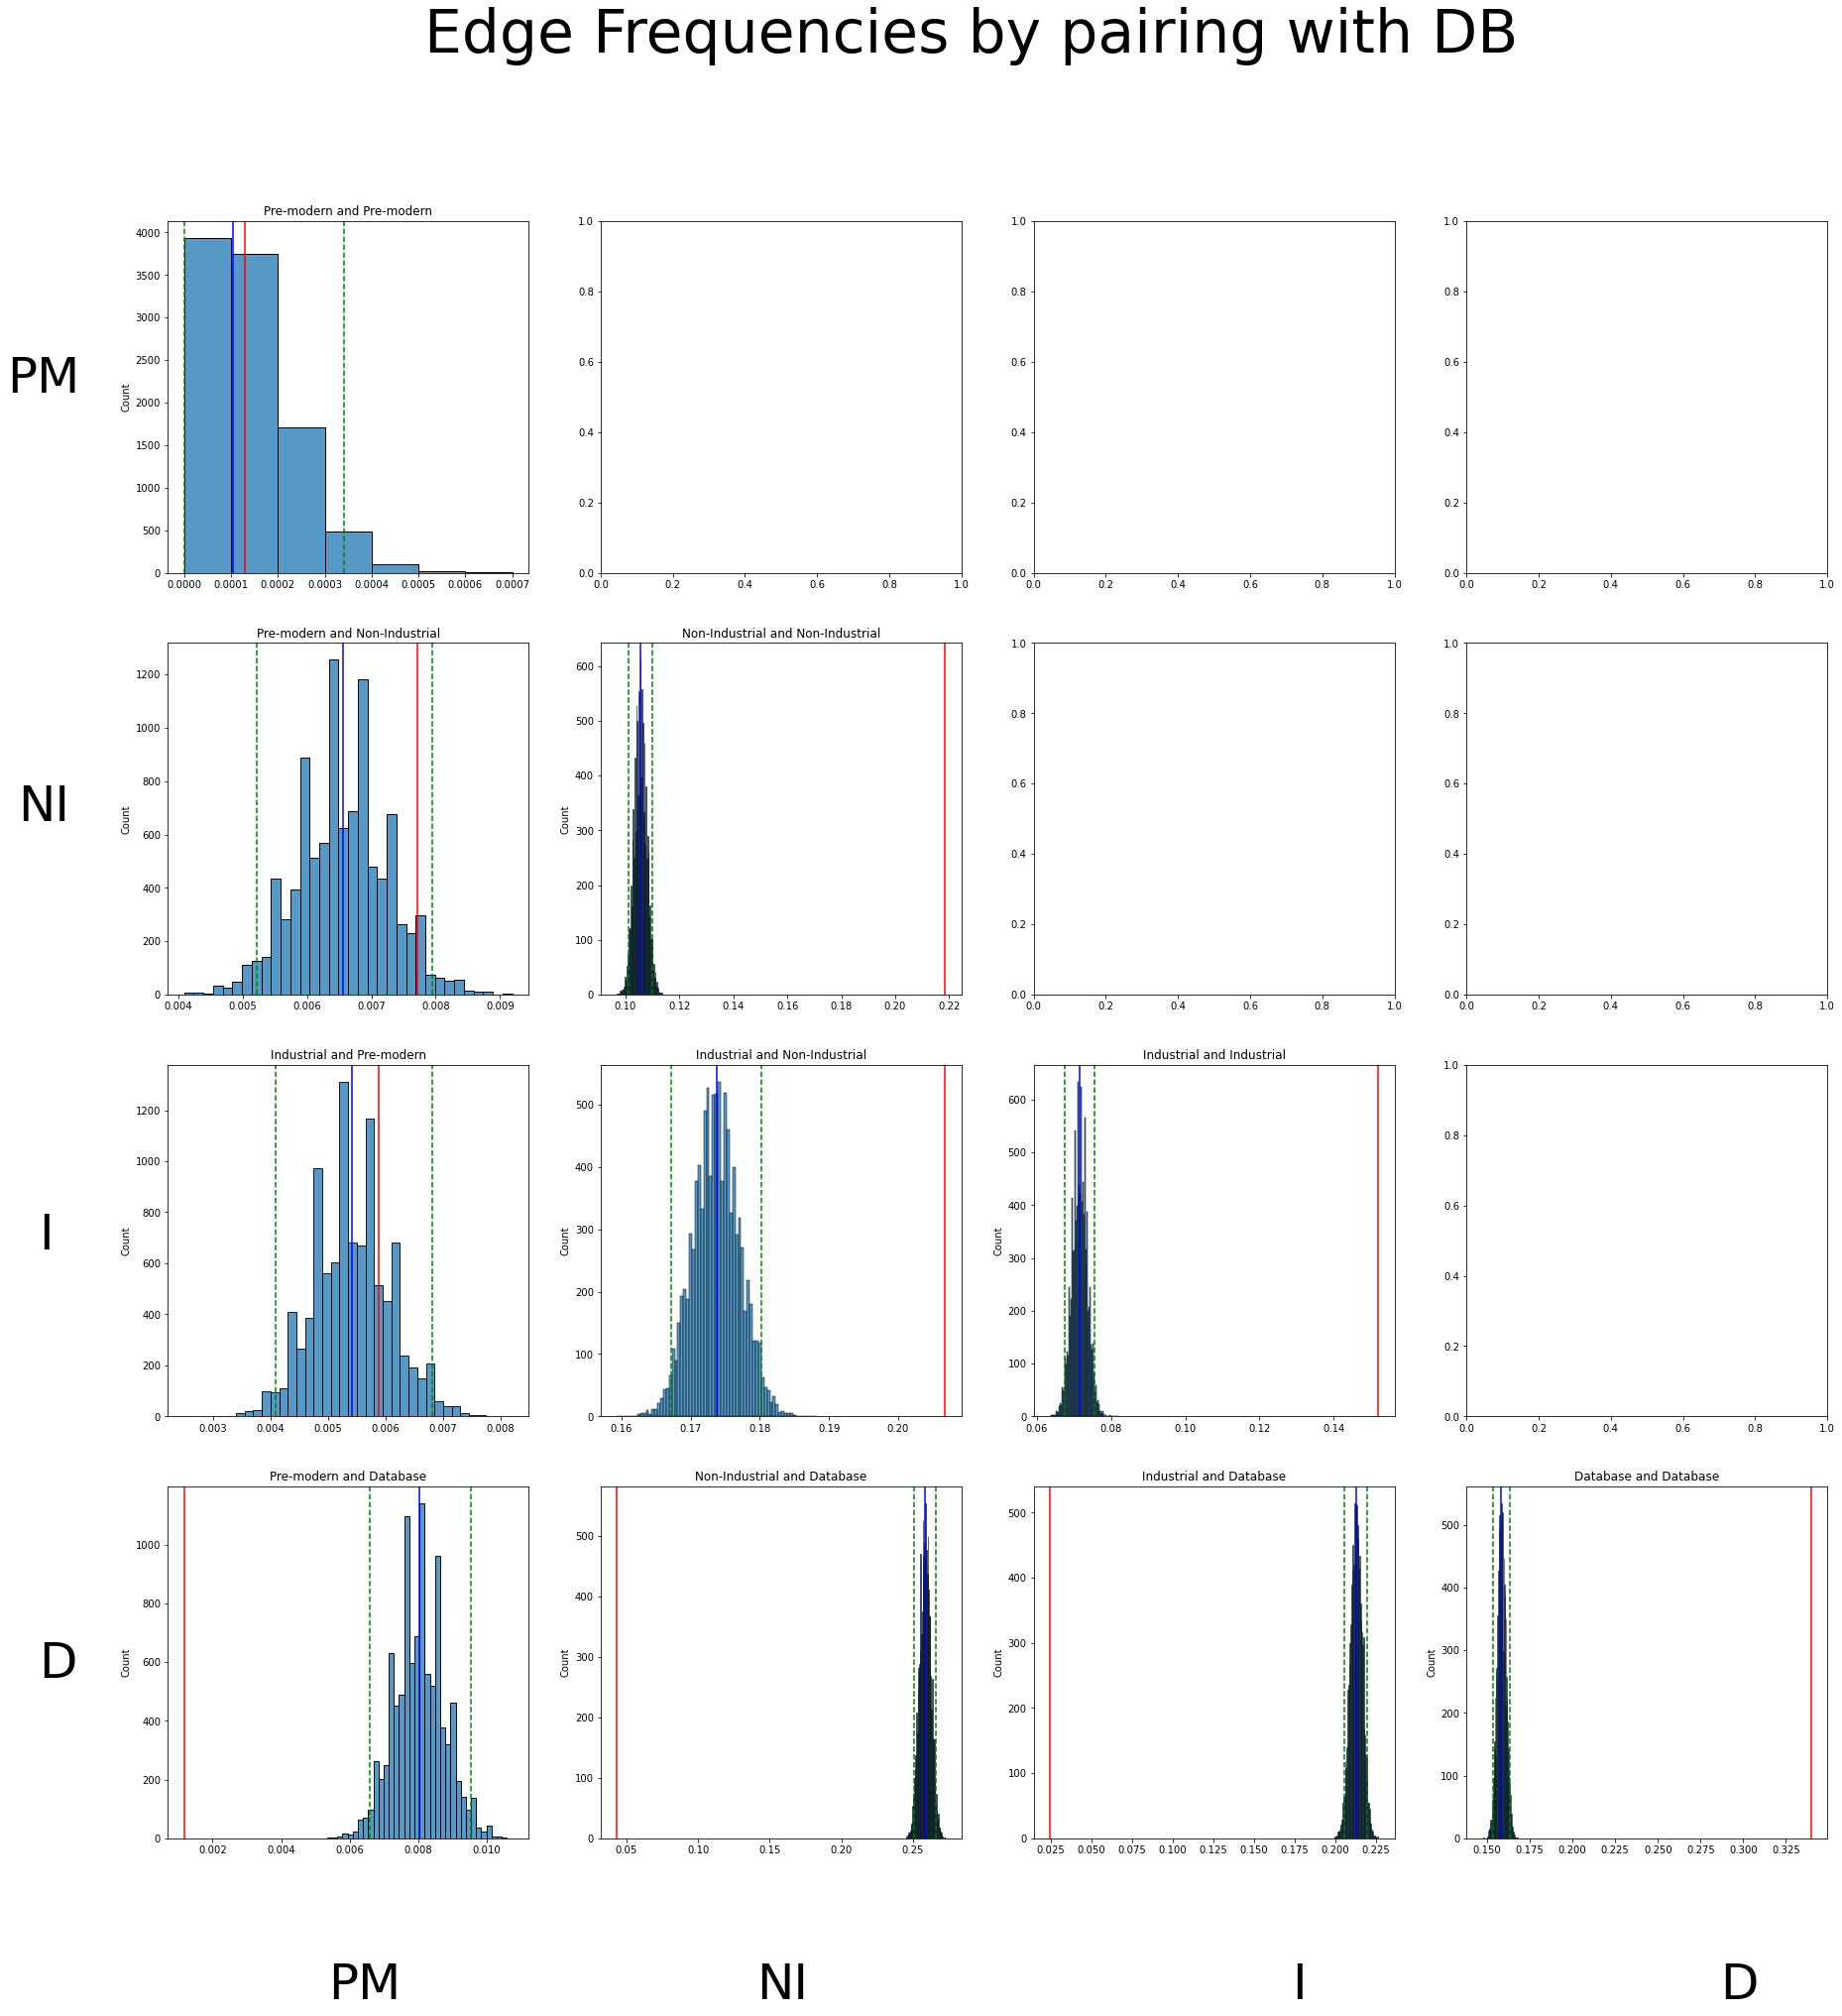

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs  = plt.subplots(4,4, figsize = (30, 30))
fig.suptitle("Edge Frequencies by pairing with DB", size = 60)

sns.histplot(Simulated_Freq_D["Pre-modern and Pre-modern"], ax = axs[0,0], binwidth= .0001)
axs[0,0].axvline(x = Real_Freq_D['Pre-modern and Pre-modern'], color = "red")
axs[0,0].set_title("Pre-modern and Pre-modern")
add_confidence_interval(Simulated_Freq_D["Pre-modern and Pre-modern"], axs[0,0])


sns.histplot(Simulated_Freq_D["Pre-modern and Non-Industrial"], ax = axs[1,0], binwidth=.00015)
axs[1,0].axvline(x = Real_Freq_D['Pre-modern and Non-Industrial'], color = "red")
axs[1,0].set_title("Pre-modern and Non-Industrial")
add_confidence_interval(Simulated_Freq_D["Pre-modern and Non-Industrial"], axs[1,0])


sns.histplot(Simulated_Freq_D["Non-Industrial and Non-Industrial"], ax = axs[1,1])
axs[1,1].axvline(x = Real_Freq_D['Non-Industrial and Non-Industrial'], color = "red")
axs[1,1].set_title("Non-Industrial and Non-Industrial")
add_confidence_interval(Simulated_Freq_D["Non-Industrial and Non-Industrial"], axs[1,1])


sns.histplot(Simulated_Freq_D["Industrial and Pre-modern"], ax = axs[2,0], binwidth=.00015)
axs[2,0].axvline(x = Real_Freq_D['Industrial and Pre-modern'], color = "red")
axs[2,0].set_title("Industrial and Pre-modern")
add_confidence_interval(Simulated_Freq_D["Industrial and Pre-modern"], axs[2,0])


sns.histplot(Simulated_Freq_D["Industrial and Non-Industrial"], ax = axs[2,1])
axs[2,1].axvline(x = Real_Freq_D['Industrial and Non-Industrial'], color = "red")
axs[2,1].set_title("Industrial and Non-Industrial")
add_confidence_interval(Simulated_Freq_D["Industrial and Non-Industrial"], axs[2,1])


sns.histplot(Simulated_Freq_D["Industrial and Industrial"], ax = axs[2,2])
axs[2,2].axvline(x = Real_Freq_D['Industrial and Industrial'], color = "red")
axs[2,2].set_title("Industrial and Industrial")
add_confidence_interval(Simulated_Freq_D["Industrial and Industrial"], axs[2,2])


sns.histplot(Simulated_Freq_D["Pre-modern and Database"], ax = axs[3,0], binwidth=.00015)
axs[3,0].axvline(x = Real_Freq_D['Pre-modern and Database'], color = "red")
axs[3,0].set_title("Pre-modern and Database")
add_confidence_interval(Simulated_Freq_D["Pre-modern and Database"], axs[3,0])


sns.histplot(Simulated_Freq_D["Non-Industrial and Database"], ax = axs[3,1])
axs[3,1].axvline(x = Real_Freq_D['Non-Industrial and Database'], color = "red")
axs[3,1].set_title("Non-Industrial and Database")
add_confidence_interval(Simulated_Freq_D["Non-Industrial and Database"], axs[3,1])


sns.histplot(Simulated_Freq_D["Industrial and Database"], ax = axs[3,2])
axs[3,2].axvline(x = Real_Freq_D['Industrial and Database'], color = "red")
axs[3,2].set_title("Industrial and Database")
add_confidence_interval(Simulated_Freq_D["Industrial and Database"], axs[3,2])


sns.histplot(Simulated_Freq_D["Database and Database"], ax = axs[3,3])
axs[3,3].axvline(x = Real_Freq_D['Database and Database'], color = "red")
axs[3,3].set_title("Database and Database")
add_confidence_interval(Simulated_Freq_D["Database and Database"], axs[3,3])



fig.text(.05,.8, "PM", size = 50)
fig.text(.055,.6, "NI", size = 50)
fig.text(.065,.4, "I", size = 50)
fig.text(.065,.2, "D", size = 50)


fig.text(.20, .05, "PM", size = 50)
fig.text(.4, .05, "NI", size = 50)
fig.text(.65, .05, "I", size = 50)
fig.text(.85, .05, "D", size = 50)

fig.savefig("/Users/jacob/Desktop/Research/Knowles/BIG Summer/Permutation Figure with DB Final.pdf", format = "pdf")

In [29]:
columns_D = ['Industrial and Industrial','Industrial and Pre-modern', 'Industrial and Non-Industrial', 
             'Industrial and Database', 'Pre-modern and Pre-modern', 'Pre-modern and Non-Industrial', 
             'Pre-modern and Database', 'Non-Industrial and Non-Industrial', 'Non-Industrial and Database', 
             'Database and Database']
rows = ["observed", "simulated mean", "upper bound", "lower bound"]

info_D = pd.DataFrame(columns=columns_D, index=rows)

for col in info_D.columns:
    info_D.loc["observed", col] = Real_Freq_D[col]
    info_D.loc["simulated mean", col] = np.mean(Simulated_Freq_D[col])
    info_D.loc["upper bound", col] = np.percentile(Simulated_Freq_D[col], 97.5)
    info_D.loc["lower bound", col] = np.percentile(Simulated_Freq_D[col], 2.5)

In [44]:
info_D

info_D.to_csv("/Users/jacob/Desktop/Research/Knowles/BIG Summer/Permutation with D table final.csv", index=True)

In [31]:
sum(Simulated_Means_D.values())

0.9999999999999908

In [32]:
sum(Real_Freq_D.values())

1.0

In [33]:
sum(Simulated_Means.values())

0.9999999999999989

In [34]:
sum(Real_Freq.values())

1.0

In [35]:
Nodes

,index,Genome,Time Period,Lifestyle
0,0,ind-DNK_MH0192_k99_103327,Industrial,Lytic
1,1,ind-DNK_MH0192_k99_112007,Industrial,Lytic
2,2,ind-DNK_MH0192_k99_112008,Industrial,Lytic
3,3,ind-DNK_MH0192_k99_112019,Industrial,Lytic
4,4,ind-DNK_MH0192_k99_59628,Industrial,Lytic
...,...,...,...,...
5297,5297,pre-TZA_H9_k119_112133,Non-Industrial,Lytic
5298,5298,pre-TZA_H9_k119_112136,Non-Industrial,Lytic
5299,5299,pre-TZA_H9_k119_112156,Non-Industrial,Lytic
5300,5300,pre-TZA_H9_k119_84601,Non-Industrial,Lytic


# Lifestyle Permutation

In [36]:
import numpy as np

L_Nodes = Nodes.iloc[0:-1]

In [37]:
L_Nodes

,index,Genome,Time Period,Lifestyle
0,0,ind-DNK_MH0192_k99_103327,Industrial,Lytic
1,1,ind-DNK_MH0192_k99_112007,Industrial,Lytic
2,2,ind-DNK_MH0192_k99_112008,Industrial,Lytic
3,3,ind-DNK_MH0192_k99_112019,Industrial,Lytic
4,4,ind-DNK_MH0192_k99_59628,Industrial,Lytic
...,...,...,...,...
5296,5296,pre-TZA_H8_k119_40821,Non-Industrial,Lytic
5297,5297,pre-TZA_H9_k119_112133,Non-Industrial,Lytic
5298,5298,pre-TZA_H9_k119_112136,Non-Industrial,Lytic
5299,5299,pre-TZA_H9_k119_112156,Non-Industrial,Lytic


In [38]:
single

,Source,Target,Source Time Label,Target Time Label,edge_weight,Source Lifestyle,Target Lifestyle
0,ind-DNK_MH0343_k99_52271,ind-DNK_MH0192_k99_103327,Industrial,Industrial,2.596023,Lytic,Lytic
1,ind-DNK_MH0374_k99_184669,ind-DNK_MH0192_k99_103327,Industrial,Industrial,5.207088,Lytic,Lytic
2,ind-DNK_MH0390_k99_197017,ind-DNK_MH0192_k99_103327,Industrial,Industrial,124.240802,Lytic,Lytic
3,ind-DNK_MH0394_k99_157803,ind-DNK_MH0192_k99_103327,Industrial,Industrial,10.846302,Lytic,Lytic
4,ind-ESP_O2.UC29.1_k99_66998,ind-DNK_MH0192_k99_103327,Industrial,Industrial,8.713587,Lytic,Lytic
...,...,...,...,...,...,...,...
135681,pre-TZA_H8_k119_40821,pre-TZA_H6_k119_91918,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135682,pre-TZA_H9_k119_112156,pre-TZA_H6_k119_91918,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135683,pre-TZA_H8_k119_40821,pre-TZA_H7_k119_54737,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135684,pre-TZA_H9_k119_112156,pre-TZA_H7_k119_54737,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic


In [39]:
L_Real_Freq = {}

In [40]:
L_Real_Freq["Lytic and Lytic"] = sum( (single["Source Lifestyle"] == "Lytic") & (single["Target Lifestyle"] == "Lytic"))/len(single)
L_Real_Freq["Temperate and Temperate"] = sum( (single["Source Lifestyle"] == "Temperate") & (single["Target Lifestyle"] == "Temperate"))/len(single)

L_Real_Freq["Lytic and Temperate"] = (sum( (single["Source Lifestyle"] == "Lytic") & (single["Target Lifestyle"] == "Temperate")) + 
    sum( (single["Source Lifestyle"] == "Temperate") & (single["Target Lifestyle"] == "Lytic"))) /len(single)

In [41]:
L_types = ["Lytic", "Temperate"]
L_perms = [ [0,0], [0,1], [1,1]]

L_Simulated_Freq = {'Lytic and Lytic': [],
 'Lytic and Temperate': [],
 'Temperate and Temperate': []}

for i in range(10000):
    ind = list(L_Nodes.index)
    first = random.sample(ind, len(ind))
    sources = L_Nodes.iloc[first]["Lifestyle"].tolist()
    second = random.sample(ind, len(ind))
    targets = L_Nodes.iloc[second]["Lifestyle"].tolist()

    resampled = pd.DataFrame({"Source Lifestyle" : sources, "Target Lifestyle" : targets})



    for pair in L_perms:
        L = len(resampled[ ((resampled["Source Lifestyle"] == L_types[pair[0]]) & (resampled["Target Lifestyle"] == L_types[pair[1]])) | 
            ((resampled["Source Lifestyle"] == L_types[pair[1]]) & (resampled["Target Lifestyle"] == L_types[pair[0]])) ])
        
        prop = L/len(resampled)

        name = L_types[pair[0]] + " and " + L_types[pair[1]]

        L_Simulated_Freq[name].append(prop)

In [42]:
L_Simulated_Freq

{'Lytic and Lytic': [0.6066779852857951,
  0.6042256178079608,
  0.608375778155065,
  0.6078098471986417,
  0.6053574797208074,
  0.6027164685908319,
  0.6030937558951142,
  0.6042256178079608,
  0.6074325598943595,
  0.6012073193737031,
  0.6059234106772307,
  0.6061120543293718,
  0.6042256178079608,
  0.6040369741558197,
  0.6000754574608564,
  0.602905112242973,
  0.6049801924165252,
  0.6006413884172798,
  0.6049801924165252,
  0.6079984908507828,
  0.6040369741558197,
  0.6013959630258442,
  0.5998868138087153,
  0.5963025844180343,
  0.6023391812865497,
  0.6040369741558197,
  0.606489341633654,
  0.5981890209394454,
  0.6047915487643841,
  0.5980003772873043,
  0.6068666289379362,
  0.6081871345029239,
  0.6019618939822675,
  0.5998868138087153,
  0.6025278249386908,
  0.6047915487643841,
  0.6057347670250897,
  0.6017732503301264,
  0.6040369741558197,
  0.6070552725900773,
  0.6078098471986417,
  0.6002641011129976,
  0.6032823995472553,
  0.6063006979815129,
  0.600452744765

'fig.text(.05,.8, "PM", size = 50)\nfig.text(.055,.6, "NI", size = 50)\nfig.text(.065,.4, "I", size = 50)\nfig.text(.065,.2, "D", size = 50)\n\n\nfig.text(.20, .05, "PM", size = 50)\nfig.text(.4, .05, "NI", size = 50)\nfig.text(.65, .05, "I", size = 50)\nfig.text(.85, .05, "D", size = 50)'

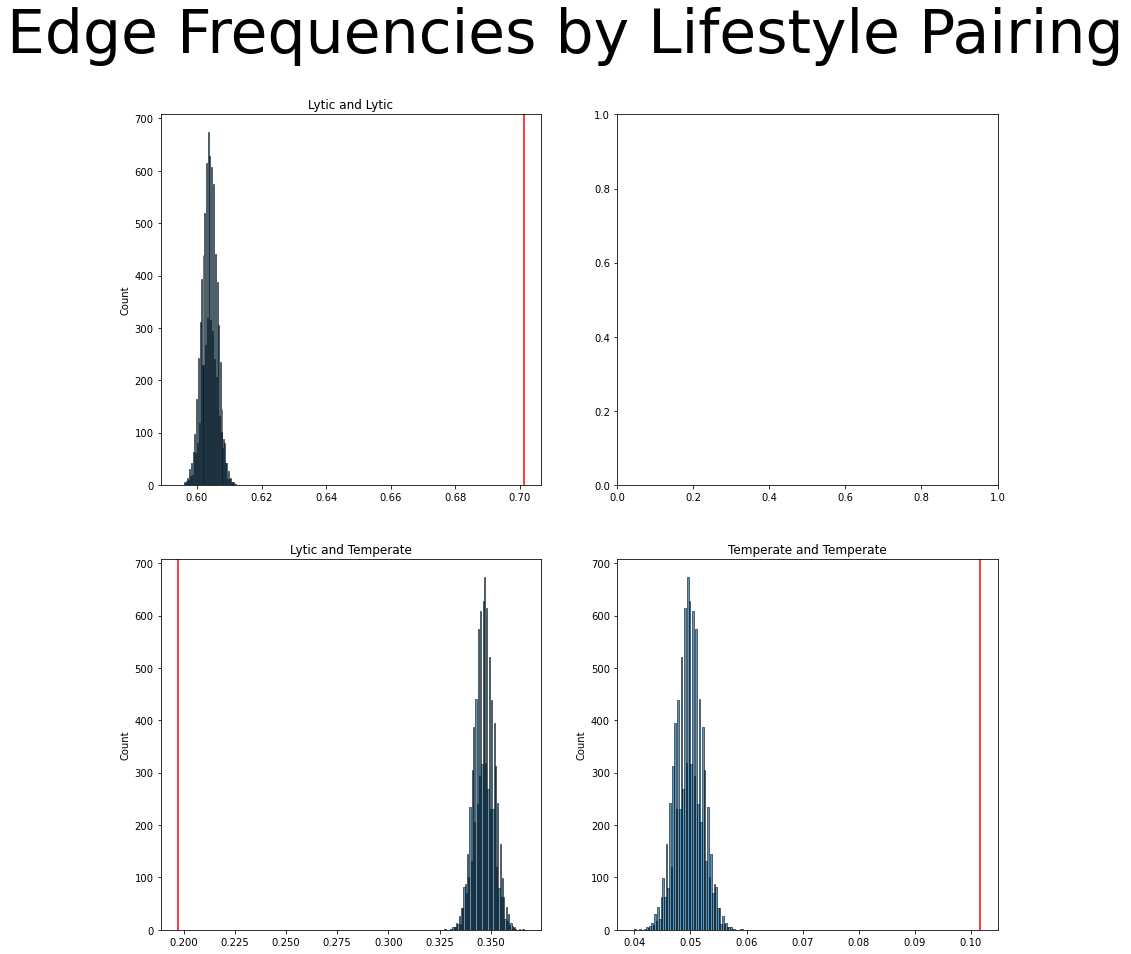

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs  = plt.subplots(2,2, figsize = (15, 15))
fig.suptitle("Edge Frequencies by Lifestyle Pairing", size = 60)

sns.histplot(L_Simulated_Freq["Lytic and Lytic"], ax = axs[0,0])
axs[0,0].axvline(x = L_Real_Freq['Lytic and Lytic'], color = "red")
axs[0,0].set_title("Lytic and Lytic")

sns.histplot(L_Simulated_Freq["Lytic and Temperate"], ax = axs[1,0])
axs[1,0].axvline(x = L_Real_Freq['Lytic and Temperate'], color = "red")
axs[1,0].set_title("Lytic and Temperate")

sns.histplot(L_Simulated_Freq["Temperate and Temperate"], ax = axs[1,1])
axs[1,1].axvline(x = L_Real_Freq['Temperate and Temperate'], color = "red")
axs[1,1].set_title("Temperate and Temperate")

"""fig.text(.05,.8, "PM", size = 50)
fig.text(.055,.6, "NI", size = 50)
fig.text(.065,.4, "I", size = 50)
fig.text(.065,.2, "D", size = 50)


fig.text(.20, .05, "PM", size = 50)
fig.text(.4, .05, "NI", size = 50)
fig.text(.65, .05, "I", size = 50)
fig.text(.85, .05, "D", size = 50)"""